### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

In [3]:
# import numpy as np
# from cmocean import cm
# import cartopy as cp
# import cartopy.crs as ccrs
# import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
# import sys
# sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
# #list of models
# sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
# import lom
# import utils as ut

# %matplotlib inline
# import warnings
# from datetime import datetime
# warnings.filterwarnings('ignore')
# import cartopy.feature as cfeature
# from importlib import reload
# import matplotlib.path as mpath
# import glob
# import pickle
# import pandas as pd
# import seawater
# import time
# plt.rcParams.update({'font.size': 12})
# font = {'family' : 'normal',
# 'weight' : 'normal',
# 'size'   : 12}

# plt.rc('font', **font)
import numpy as np
import pymannkendall as mk

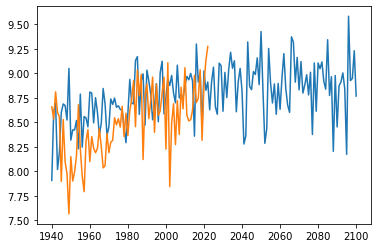

In [4]:
tseas = 'SON'
tdir = '/gpfs/data/greenocean/software/resources/windsProcessed'

wspd_1A = xr.open_dataset(f'{tdir}/wspd_1A_overwatermean-50N.nc')
wspd_era = xr.open_dataset(f'{tdir}/wspd_ERA5_v2023_overwatermean-50N.nc')

tv = wspd_1A.wspd.sel(time_counter=(wspd_1A['time_counter.season'] == tseas)).groupby('time_counter.year').mean()
tv_era = wspd_era.wspd.sel(time_counter=(wspd_era['time_counter.season'] == tseas)).groupby('time_counter.year').mean()

plt.plot(tv.year,tv)
plt.plot(tv_era.year,tv_era)

In [5]:
data = np.zeros([5,6])
df = pd.DataFrame(data, columns=['trend-1940-1980','p-1940-1980', 'trend-1980-2020','p-1980-2020','trend-1940-2020','p-1940-2020', ],\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])

df

,trend-1940-1980,p-1940-1980,trend-1980-2020,p-1980-2020,trend-1940-2020,p-1940-2020
full year,0.0,0.0,0.0,0.0,0.0,0.0
DJF,0.0,0.0,0.0,0.0,0.0,0.0
MAM,0.0,0.0,0.0,0.0,0.0,0.0
JJA,0.0,0.0,0.0,0.0,0.0,0.0
SON,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data = np.zeros([5,6])
seas = ['DJF','MAM', 'JJA', 'SON',]

yr = 1940; yrend = 1979
tw = wspd_1A.wspd.sel(time_counter=slice(f'{yr}-01-01', f'{yrend}-12-31'))
tw2 = tw.groupby('time_counter.year').mean()
trend, h, p, z, Tau, s, var_s, slope, intercept \
    = mk.original_test(tw2)
print(f'UKESM {yr}-{yrend}, full year: {trend}, slope (per year) {slope}, p {p}')
data[0,0] = slope*10; data[0,1] = p 
for i in range(0,4):
    tseas = seas[i]
    tw2 = tw.sel(time_counter=(tw['time_counter.season'] == tseas)).groupby('time_counter.year').mean()
    trend, h, p, z, Tau, s, var_s, slope, intercept \
        = mk.original_test(tw2)
    print(f'UKESM {yr}-{yrend}, {tseas}: {trend}, slope (per year) {slope}, p {p}')
    data[i+1,0] = slope*10; data[i+1,1] = p 

print()
yr = 1980; yrend = 2020
tw = wspd_1A.wspd.sel(time_counter=slice(f'{yr}-01-01', f'{yrend}-12-31'))
tw2 = tw.groupby('time_counter.year').mean()
trend, h, p, z, Tau, s, var_s, slope, intercept \
    = mk.original_test(tw2)
data[0,2] = slope*10; data[0,3] = p 
print(f'UKESM {yr}-{yrend}, full year: {trend}, slope (per year) {slope}, p {p}')
for i in range(0,4):
    tseas = seas[i]
    tw2 = tw.sel(time_counter=(tw['time_counter.season'] == tseas)).groupby('time_counter.year').mean()
    trend, h, p, z, Tau, s, var_s, slope, intercept \
        = mk.original_test(tw2)
    print(f'UKESM {yr}-{yrend}, {tseas}: {trend}, slope (per year) {slope}, p {p}')
    data[i+1,2] = slope*10; data[i+1,3] = p 
print()

yr = 1940; yrend = 2020
tw = wspd_1A.wspd.sel(time_counter=slice(f'{yr}-01-01', f'{yrend}-12-31'))
tw2 = tw.groupby('time_counter.year').mean()
trend, h, p, z, Tau, s, var_s, slope, intercept \
    = mk.original_test(tw2)
data[0,4] = slope*10; data[0,5] = p 

print(f'UKESM {yr}-{yrend}, full year: {trend}, slope (per year) {slope}, p {p}')
for i in range(0,4):
    tseas = seas[i]
    tw2 = tw.sel(time_counter=(tw['time_counter.season'] == tseas)).groupby('time_counter.year').mean()
    trend, h, p, z, Tau, s, var_s, slope, intercept \
        = mk.original_test(tw2)
    data[i+1,4] = slope*10; data[i+1,5] = p 
    print(f'UKESM {yr}-{yrend}, {tseas}: {trend}, slope (per year) {slope}, p {p}')

# data = np.zeros([5,6])
df_UKESM = pd.DataFrame(data, columns=['trend-1940-1980','p-1940-1980', 'trend-1980-2020','p-1980-2020','trend-1940-2020','p-1940-2020', ],\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])
df_UKESM.attrs = {"made in": '/scratch/SOZONE/windAnalyis/paperFigures/MannKendall.ipynb'}
df_UKESM.to_csv('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperFigures/csvs/MK_UKESM_1940-2020.csv')



UKESM 1940-1979, full year: no trend, slope (per year) 0.0036440668941327163, p 0.09569390835163927
UKESM 1940-1979, DJF: no trend, slope (per year) 0.003697128031298352, p 0.23929351176558455
UKESM 1940-1979, MAM: no trend, slope (per year) 0.0021780135772849697, p 0.3107545604252415
UKESM 1940-1979, JJA: no trend, slope (per year) 0.00184950612691398, p 0.35734719361075706
UKESM 1940-1979, SON: no trend, slope (per year) 0.0038840020954571787, p 0.3220089692456942

UKESM 1980-2020, full year: increasing, slope (per year) 0.008257886322540247, p 2.531455538257177e-05
UKESM 1980-2020, DJF: increasing, slope (per year) 0.019798755263488472, p 9.13842870065018e-06
UKESM 1980-2020, MAM: increasing, slope (per year) 0.007027300774358277, p 0.049346085963436925
UKESM 1980-2020, JJA: increasing, slope (per year) 0.00606849855485614, p 0.0157409694014905
UKESM 1980-2020, SON: no trend, slope (per year) 0.0025888200356579604, p 0.4383374552726653

UKESM 1940-2020, full year: increasing, slope 

In [10]:
data = np.zeros([5,6])
seas = ['DJF','MAM', 'JJA', 'SON',]

yr = 1940; yrend = 1979
tw = wspd_era.wspd.sel(time_counter=slice(f'{yr}-01-01', f'{yrend}-12-31'))
tw2 = tw.groupby('time_counter.year').mean()
trend, h, p, z, Tau, s, var_s, slope, intercept \
    = mk.original_test(tw2)
print(f'ERA {yr}-{yrend}, full year: {trend}, slope (per year) {slope}, p {p}')
data[0,0] = slope*10; data[0,1] = p 
for i in range(0,4):
    tseas = seas[i]
    tw2 = tw.sel(time_counter=(tw['time_counter.season'] == tseas)).groupby('time_counter.year').mean()
    trend, h, p, z, Tau, s, var_s, slope, intercept \
        = mk.original_test(tw2)
    print(f'ERA {yr}-{yrend}, {tseas}: {trend}, slope (per year) {slope}, p {p}')
    data[i+1,0] = slope*10; data[i+1,1] = p 

print()
yr = 1980; yrend = 2020
tw = wspd_era.wspd.sel(time_counter=slice(f'{yr}-01-01', f'{yrend}-12-31'))
tw2 = tw.groupby('time_counter.year').mean()
trend, h, p, z, Tau, s, var_s, slope, intercept \
    = mk.original_test(tw2)
data[0,2] = slope*10; data[0,3] = p 
print(f'ERA {yr}-{yrend}, full year: {trend}, slope (per year) {slope}, p {p}')
for i in range(0,4):
    tseas = seas[i]
    tw2 = tw.sel(time_counter=(tw['time_counter.season'] == tseas)).groupby('time_counter.year').mean()
    trend, h, p, z, Tau, s, var_s, slope, intercept \
        = mk.original_test(tw2)
    print(f'ERA {yr}-{yrend}, {tseas}: {trend}, slope (per year) {slope}, p {p}')
    data[i+1,2] = slope*10; data[i+1,3] = p 
print()

yr = 1940; yrend = 2020
tw = wspd_era.wspd.sel(time_counter=slice(f'{yr}-01-01', f'{yrend}-12-31'))
tw2 = tw.groupby('time_counter.year').mean()
trend, h, p, z, Tau, s, var_s, slope, intercept \
    = mk.original_test(tw2)
data[0,4] = slope*10; data[0,5] = p 

print(f'ERA {yr}-{yrend}, full year: {trend}, slope (per year) {slope}, p {p}')
for i in range(0,4):
    tseas = seas[i]
    tw2 = tw.sel(time_counter=(tw['time_counter.season'] == tseas)).groupby('time_counter.year').mean()
    trend, h, p, z, Tau, s, var_s, slope, intercept \
        = mk.original_test(tw2)
    data[i+1,4] = slope*10; data[i+1,5] = p 
    print(f'ERA {yr}-{yrend}, {tseas}: {trend}, slope (per year) {slope}, p {p}')

# data = np.zeros([5,6])
df_ERA = pd.DataFrame(data, columns=['trend-1940-1980','p-1940-1980', 'trend-1980-2020','p-1980-2020','trend-1940-2020','p-1940-2020', ],\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])
df_ERA.attrs = {"made in": '/scratch/SOZONE/windAnalyis/paperFigures/MannKendall.ipynb'}
df_ERA.to_csv('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperFigures/csvs/MK_ERA_1940-2020.csv')



ERA 1940-1979, full year: no trend, slope (per year) 0.001065727894101327, p 0.6834306388633604
ERA 1940-1979, DJF: no trend, slope (per year) 0.0027808418807810558, p 0.33352610308834585
ERA 1940-1979, MAM: no trend, slope (per year) 0.00020943178963181273, p 0.9721171358417333
ERA 1940-1979, JJA: decreasing, slope (per year) -0.0074512979210389525, p 0.008174287438533767
ERA 1940-1979, SON: no trend, slope (per year) 0.007529596100760905, p 0.1452877890952673

ERA 1980-2020, full year: no trend, slope (per year) 0.0027749918661615345, p 0.10339115177329683
ERA 1980-2020, DJF: increasing, slope (per year) 0.009734935072930075, p 0.004181375839851453
ERA 1980-2020, MAM: no trend, slope (per year) 0.0045042686682510436, p 0.0638436989206157
ERA 1980-2020, JJA: no trend, slope (per year) -0.0006995819323066016, p 0.761689952058004
ERA 1980-2020, SON: no trend, slope (per year) 0.0003880054447280489, p 0.8662064065863087

ERA 1940-2020, full year: increasing, slope (per year) 0.0083391663

In [ ]:
df_UKESM

,trend-1940-1980,p-1940-1980,trend-1980-2020,p-1980-2020,trend-1940-2020,p-1940-2020
full year,0.036441,0.095694,0.082579,0.000025,0.058164,1.243006e-12
DJF,0.036971,0.239294,0.197988,0.000009,0.120596,5.404566e-13
MAM,0.021780,0.310755,0.070273,0.049346,0.028129,2.314688e-03
JJA,0.018495,0.357347,0.060685,0.015741,0.019742,2.568852e-02
SON,0.038840,0.322009,0.025888,0.438337,0.063907,4.938800e-07


In [ ]:
p

0.8371335132135409

In [18]:
w = xr.open_dataset('/gpfs/data/greenocean/software/resources/MetOffice/fixed_ozone/ssp126/u-be682_ssp126/be682_bulk_y2070m10.nc')
# w['uwind10m']
w

<xarray.Dataset>
Dimensions:       (latitude: 144, longitude: 192, time_counter: 240)
Coordinates:
  * longitude     (longitude) float32 0.9375 2.8125 4.6875 ... 357.1875 359.0625
  * latitude      (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * time_counter  (time_counter) object 2070-10-01 01:30:00 ... 2070-10-30 22...
Data variables:
    ht            float32 ...
    tair10m       (time_counter, latitude, longitude) float32 ...
    qair10m       (time_counter, latitude, longitude) float32 ...
    surface       float32 ...
    snow          (time_counter, latitude, longitude) float32 ...
    precip        (time_counter, latitude, longitude) float32 ...
Attributes:
    nco_openmp_thread_number:  1
    history:                   2022-04-17T23:40:30: packnc -k4 -d5 -O -q -cpa...

Spatial Mann-Kendall

regridding steps to make the starting nc:
1. (done already) SOZONE/windAnalyis/paperFigures/runnerMakeWspd.py 
2. (done now) gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperFigures/runnerLatLonsForRegrid.py
3. bash regridWindsWithCDO.sh 


In [13]:
scens = ['1FA', '1FB','2FA', '2FB','3FA', '3FB']

for s in scens:
    for y in range(2020,2101):
'  /gpfs/data/greenocean/software/resources/windsProcessed/UKESM_1FA_wspd_2023_regridded.nc'
# w = xr.open_dataset()
# w2 = w.wspd.groupby('time_counter.season').mean()

# w2

<xarray.DataArray 'wspd' (season: 4, lat: 180, lon: 360)>
array([[[4.035219 , 4.084905 , 4.0849075, ..., 3.9931402, 3.9931417,
         4.0352173],
        [4.0352225, 4.0849066, 4.0849133, ..., 3.99314  , 3.9931457,
         4.0352182],
        [4.0352297, 4.084906 , 4.0849195, ..., 3.9931383, 3.993151 ,
         4.0352182],
        ...,
        [5.792212 , 5.8115172, 5.830677 , ..., 5.741503 , 5.7542386,
         5.772756 ],
        [5.755593 , 5.761359 , 5.767133 , ..., 5.7383184, 5.744071 ,
         5.7498283],
        [5.796277 , 5.7952046, 5.7941337, ..., 5.7994976, 5.7984233,
         5.797349 ]],

       [[7.30315  , 7.280758 , 7.280755 , ..., 7.323088 , 7.3230896,
         7.3031516],
        [7.3031545, 7.2807565, 7.2807493, ..., 7.3230877, 7.323091 ,
         7.303158 ],
        [7.3031535, 7.2807565, 7.28074  , ..., 7.3230877, 7.323095 ,
         7.3031645],
...
        [4.3951116, 4.3909593, 4.3868685, ..., 4.406926 , 4.4034667,
         4.399325 ],
        [4.324326 , 4.3214006, 4.3184767, ..., 4.333105 , 4.3301783,
         4.3272514],
        [4.464624 , 4.464274 , 4.4639235, ..., 4.4656606, 4.465317 ,
         4.4649706]],

       [[6.367206 , 6.262667 , 6.262662 , ..., 6.451922 , 6.451919 ,
         6.367209 ],
        [6.3671985, 6.2626686, 6.2626505, ..., 6.4519224, 6.451917 ,
         6.367211 ],
        [6.367189 , 6.26267  , 6.262633 , ..., 6.4519224, 6.4519095,
         6.3672156],
        ...,
        [6.1804676, 6.185357 , 6.1901197, ..., 6.154734 , 6.168891 ,
         6.175448 ],
        [5.9159975, 5.9206653, 5.925339 , ..., 5.9020233, 5.906676 ,
         5.9113355],
        [5.6461763, 5.645411 , 5.6446466, ..., 5.648471 , 5.647705 ,
         5.6469393]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'